In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Array of Trains
delayed_trains = {}
    
# Target User
target_user = "SubwayStats"

# Loop through 50 pages of 
for x in range(1, 51):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        
        # Print the tweet and date if it contains the word: "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
            print(tweet["text"].lower())
            
            # Loop through hashtags to extract the train names
            for hashtag in tweet["entities"]["hashtags"]:
                
                train_name = hashtag["text"].lower()
                
                # Remove all hashtags that are extraneous
                if (train_name != "nycsubway" and train_name != "mta" and train_name != "nyc"):
                                        
                    # If train is new, add it the list...
                    if(train_name not in delayed_trains):
                        delayed_trains[train_name] = 1
                    
                    # If it already exists add 1 to its count
                    else:    
                        delayed_trains[train_name] += 1 

#4train #5train and #6train have service change  #mta https://t.co/jh4u3ctg8s
service change reported on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nyc https://t.co/jh4u3ctg8s
delays reported on #4train #5train and #6train [4] all trains from junius st to sutter av-rutland rd board at the n… https://t.co/gdhl8qxy3h
delays on #1train #2train and #3train [1] south ferry-bound trains run express from 96 st to chambers st #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have service change [4] all trains from junius st to sutter av-rutland rd board at the… https://t.co/mucoggrxp1
delays on #ntrain #qtrain #rtrain #wtrain [n] service operates in two sections: #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays [d] coney island-bound trains make local stops at 23 st and 14 st… https://t.co/olmvm7vdyl
#ntrain #qtrain #rtrain #wtrain have service change [n] manhattan-bound trains run via the [q] from deka

#7train have delays  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #nycsubway https://t.co/jh4u3ctg8s
planned work reported on #ntrain #qtrain #rtrain #wtrain [n] [w] trains may experience delays due to slow speed ord… https://t.co/umnyovf8lo
service change reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays [n] [w] trains may experience delays due to slow speed order between qu… https://t.co/gxoym3t0ho
#btrain #dtrain #ftrain #mtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #nyc https://t.co/jh4u3ctg8s
service change reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have service change  #nyc https://t.co/jh4u3ctg8s
service change on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #nyc https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have

planned work on #ntrain #qtrain #rtrain #wtrain [n] [w] trains may experience delays due to slow speed order betwee… https://t.co/4vcyvpvj38
delays on #jtrain and #ztrain  #mta https://t.co/jh4u3ctg8s
#jtrain and #ztrain have service change  #mta https://t.co/jh4u3ctg8s
delays on #btrain #dtrain #ftrain #mtrain [b] brighton beach-bound trains run local from prospect park to kings hwy… https://t.co/n8lf6oqh6q
#4train #5train and #6train have delays [4] crown heights-bound trains skip mosholu pkwy #nycsubway https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays  #nyc https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change [b] brighton beach-bound trains run local from prospect park to… https://t.co/ovcnt0i4wc
delays reported on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have delays [4] crown heights-bound trains skip mosholu 

delays on #1train #2train and #3train [1] [2] trains make all [3] stops between 14 st and 96 st. #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have delays  #nycsubway https://t.co/jh4u3ctg8s
delays reported on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have service change  #nyc https://t.co/jh4u3ctg8s
delays on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have planned work [n] [w] trains may experience delays due to slow speed order betw… https://t.co/f9m7qpjxqw
#atrain #ctrain and #etrain have service change  #mta https://t.co/jh4u3ctg8s
delays on #ntrain #qtrain #rtrain #wtrain [n] [w] trains may experience delays due to slow speed order between quee… https://t.co/dafimexc9u
service change reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
delays on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
delays reported on #1train #2train and #3train  #mta https://t

#atrain #ctrain and #etrain have delays  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #nycsubway https://t.co/jh4u3ctg8s
service change reported on #jtrain and #ztrain  #mta https://t.co/jh4u3ctg8s
planned work on #ntrain #qtrain #rtrain #wtrain [n] [w] trains may experience delays due to slow speed order betwee… https://t.co/femhjuj2gv
service change on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays  #nyc https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change [r] trains may experience delays due to slow speed order betwee… https://t.co/kzlh0wdavh
service change on #sirtrain  #mta https://t.co/jh4u3ctg8s
service change reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
delays reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #nyc https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have servic

#sirtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
service change reported on #sirtrain  #mta https://t.co/jh4u3ctg8s
service change on #4train #5train and #6train [4] all trains from junius st to sutter av-rutland rd board at the ne… https://t.co/qmodpphkqo
#btrain #dtrain #ftrain #mtrain have delays [d] trains provide alternate service #nyc https://t.co/jh4u3ctg8s
delays reported on #atrain #ctrain and #etrain [a] inwood-bound trains skip spring st, 23 st and 50 st #mta https://t.co/jh4u3ctg8s
#7train have delays  #nycsubway https://t.co/jh4u3ctg8s
#4train #5train and #6train have delays [4] all trains from junius st to sutter av-rutland rd board at the new lots… https://t.co/gm5pkmaxus
service change reported on #4train #5train and #6train [4] all trains from junius st to sutter av-rutland rd board… https://t.co/ffhz0vlzpq
service change on #btrain #dtrain #ftrain #mtrain [d] trains provide alternate service #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have servic

delays reported on #ntrain #qtrain #rtrain #wtrain [n] no trains between times sq-42 st and ditmars blvd #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays [a] no trains between 181 st and 207 st #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change [a] no trains between 181 st and 207 st #nycsubway https://t.co/jh4u3ctg8s
delays reported on #atrain #ctrain and #etrain [a] no trains between 181 st and 207 st #mta https://t.co/jh4u3ctg8s
delays reported on #4train #5train and #6train [6] pelham bay park-bound trains run express from 3 av-138 st to par… https://t.co/x5urulta1o
#4train #5train and #6train have service change [6] pelham bay park-bound trains run express from 3 av-138 st to pa… https://t.co/4kh1a3jaw5
#atrain #ctrain and #etrain have service change [a] no trains between 181 st and 207 st #nyc https://t.co/jh4u3ctg8s
#4train #5train and #6train have service change [6] pelham bay park-bound trains run express from 3 av-138 st to pa… ht

service change on #1train #2train and #3train [3] no trains running #mta https://t.co/jh4u3cbejs
#gtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays [b] service ends early #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change [b] service ends early #nycsubway https://t.co/jh4u3ctg8s
delays on #atrain #ctrain and #etrain [a] ozone park/far rockaway-bound trains run local from hoyt-schermerhorn to… https://t.co/01fktms7k9
#atrain #ctrain and #etrain have delays [c] euclid av-bound trains skip 155, 135, 116, 110, 103, 96, 86, 81 and 72… https://t.co/wumqk4jsum
delays reported on #btrain #dtrain #ftrain #mtrain [b] service ends early #mta https://t.co/jh4u3ctg8s
delays reported on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change [m] service ends early between 71 av and essex st[e] [f] [r] tr… https://t.co/fouxaca77z
#atrain #ctrain and #etrain have service

In [3]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'4train': 119, '5train': 119, '6train': 119, '1train': 88, '2train': 88, '3train': 88, 'btrain': 138, 'dtrain': 138, 'ftrain': 138, 'mtrain': 138, 'ntrain': 136, 'qtrain': 136, 'rtrain': 136, 'wtrain': 136, 'atrain': 130, 'ctrain': 130, 'etrain': 130, 'strain': 8, '7train': 35, 'ltrain': 25, 'gtrain': 13, 'jtrain': 20, 'ztrain': 20, 'sirtrain': 3}


1train       88
2train       88
3train       88
4train      119
5train      119
6train      119
7train       35
atrain      130
btrain      138
ctrain      130
dtrain      138
etrain      130
ftrain      138
gtrain       13
jtrain       20
ltrain       25
mtrain      138
ntrain      136
qtrain      136
rtrain      136
sirtrain      3
strain        8
wtrain      136
ztrain       20
dtype: int64

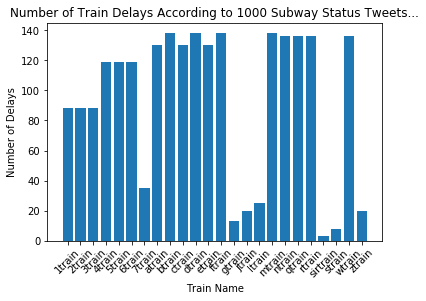

In [4]:
# Create a plot  
len(delayed_trains_pd.index)
plt.bar(range(len(delayed_trains_pd.index)), delayed_trains_pd.values)
plt.xticks(range(len(delayed_trains_pd.index)), delayed_trains_pd.index, rotation=45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")
plt.show()